In [1]:
#hidden cell
import types
from botocore.client import Config
import ibm_boto3

client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='*******',
ibm_auth_endpoint='https://iam.ng.bluemix.net/oidc/token',
config=Config(signature_version='oauth'),
endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
bucket = '*******'

# Import necesssary Libraries

In [2]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 7.9MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [3]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

# Question 2: Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

## <font color="maroon">Read Data</font>

In [4]:
# Download data from IBM cloud
client_cred.download_file(Bucket=bucket,Key='df_raw_cos_nyc.pkl',Filename='./df_raw_local.pkl')
df = pd.read_pickle('./df_raw_local.pkl')
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-12-30T13:34:17.000,45276345,HEAT/HOT WATER,"10,033.000",2 MAGAW PLACE,MAGAW PLACE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,MANHATTAN,40.851,-73.937,NaN,RESIDENTIAL BUILDING,Open
1,2019-12-30T20:58:43.000,45275367,HEAT/HOT WATER,"10,468.000",2500 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,BRONX,40.866,-73.904,NaN,RESIDENTIAL BUILDING,Open
2,2019-12-30T17:18:18.000,45276885,HEAT/HOT WATER,"10,454.000",700 EAST 134 STREET,EAST 134 STREET,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BRONX,40.802,-73.915,NaN,RESIDENTIAL BUILDING,Open
3,2019-12-30T14:29:12.000,45277476,WATER LEAK,"11,221.000",700 GATES AVENUE,GATES AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.688,-73.937,NaN,RESIDENTIAL BUILDING,Open
4,2019-12-30T16:50:51.000,45276451,UNSANITARY CONDITION,"11,213.000",1018 EASTERN PARKWAY,EASTERN PARKWAY,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.669,-73.935,NaN,RESIDENTIAL BUILDING,Open


## Filter data to contain only complaints before Dec 31 2018 and top complaint type as per question 1

In [5]:
df_new = df[(df.created_date <= '2018-12-31') & ((df.complaint_type=='HEAT/HOT WATER') | (df.complaint_type=='HEATING'))]
df_new = df_new.dropna()
df_new.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
109134,2018-12-30T10:02:06.000,41332603,HEAT/HOT WATER,"11,694.000",106-10 SHORE FRONT PARKWAY,SHORE FRONT PARKWAY,ADDRESS,Rockaway Park,The Department of Housing Preservation and Development conducted or attempted to conduct an inspection. More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.,QUEENS,40.581,-73.826,2019-01-03T11:05:37.000,RESIDENTIAL BUILDING,Closed
109137,2018-12-30T13:53:11.000,41329931,HEAT/HOT WATER,"11,432.000",150-11 88 AVENUE,88 AVENUE,ADDRESS,Jamaica,The Department of Housing Preservation and Development conducted or attempted to conduct an inspection. More information about inspection results can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.,QUEENS,40.706,-73.806,2019-01-03T11:21:11.000,RESIDENTIAL BUILDING,Closed
109150,2018-12-29T05:34:30.000,41323919,HEAT/HOT WATER,"10,027.000",25 WEST 128 STREET,WEST 128 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Development contacted an occupant of the apartment or building and verified that the complaint was addressed. The complaint has been closed.,MANHATTAN,40.809,-73.942,2019-01-02T07:59:40.000,RESIDENTIAL BUILDING,Closed
109151,2018-12-30T11:19:41.000,41323891,HEAT/HOT WATER,"10,468.000",2291 DR M L KING JR BOULEVARD,DR M L KING JR BOULEVARD,ADDRESS,BRONX,The Department of Housing Preservation and Development has closed this complaint administratively. More information can be found through HPD's website at www.nyc.gov/hpd by using HPDONLINE (enter your address on the home page) and entering your SR number under the complaint status option.,BRONX,40.861,-73.907,2019-01-02T02:02:57.000,RESIDENTIAL BUILDING,Closed
109152,2018-12-30T09:55:11.000,41323809,HEAT/HOT WATER,"10,301.000",400 ST MARKS PLACE,ST MARKS PLACE,ADDRESS,STATEN ISLAND,"The Department of Housing Preservation and Development was not able to gain access to your apartment or others in the building to inspect for a lack of heat or hot water. The complaint has been closed. If the condition still exists, please file a new complaint.",STATEN ISLAND,40.640,-74.077,2019-01-02T02:03:03.000,RESIDENTIAL BUILDING,Closed


In [6]:
# Get the shape of new df
df_new.shape

(1877756, 15)

In [7]:
df_new.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

In [8]:
# Get boroughs with most complaints
df_new.borough.value_counts()

BRONX            518629
BROOKLYN         495911
MANHATTAN        362542
Unspecified      278243
QUEENS           206669
STATEN ISLAND     15762
Name: borough, dtype: int64

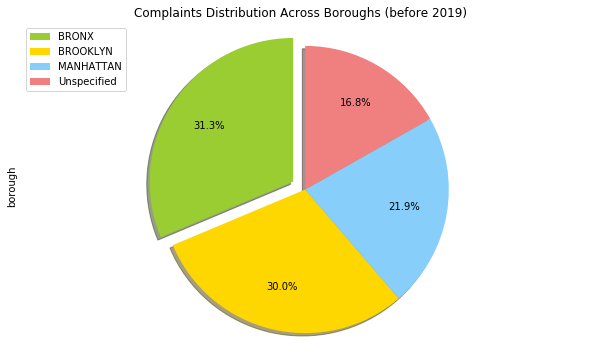

In [9]:
colors_list = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode_list = [0.1, 0, 0, 0] # explode the top borough piece
chart_labels = df_new.borough.value_counts().index

df_new['borough'].value_counts().head(4).plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=0.7,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Complaints Distribution Across Boroughs (before 2019)') 

plt.axis('equal') 

# add legend
plt.legend(labels=chart_labels, loc='upper left') 

plt.show()

## <font color="red"> Bronx is the borough with most complaints. So let's focus on this borough. We filter the datatable to only reflect the information for "BRONX".</font>

In [10]:
df_complaint_bronx = df_new[df_new['borough'] == 'BRONX']
df_complaint_bronx.shape

(518629, 15)

## Let's find the Zip codes with most complaints in BRONX

In [11]:
df_top_zip = df_complaint_bronx.groupby(['incident_zip'], as_index=False).agg({'unique_key':'count'})
df_top_zip.columns = ["zip","cnt"]
df_top_zip.sort_values(['cnt'],ascending=False).head(10)

,zip,cnt
7,"10,458.000",49601
16,"10,467.000",49574
17,"10,468.000",43786
2,"10,453.000",43072
1,"10,452.000",37366
6,"10,457.000",33611
5,"10,456.000",33116
11,"10,462.000",30889
12,"10,463.000",27257
21,"10,472.000",26669


In [12]:
df_complaint_incident_zip= np.zeros(shape=(len(df_complaint_bronx['incident_zip'].unique()),2))
   
for i, zip_code in enumerate(df_complaint_bronx['incident_zip'].unique()):
#    df_complaint_address[i,0]=i
    df_complaint_incident_zip[i,0]=zip_code
    df_complaint_incident_zip[i,1]=sum(df_complaint_bronx['incident_zip']==zip_code)

In [13]:
# argument for area having maximum complaints
arg_max = np.argmax(df_complaint_incident_zip[:,1])
# zip address for maximum complaint location
zip_max_complaints = df_complaint_incident_zip[arg_max,0]
# maximum number of complaint in the above zip
maximum_complaints = np.max(df_complaint_incident_zip[:,1])

print('Zip area:', int(zip_max_complaints), 'has maxmimum no of complaints:', int(maximum_complaints))
# just to check out which borough had maximum complaints
# print(df_new.set_index('incident_zip').loc[zip_max_complaints]['city'])

Zip area: 10458 has maxmimum no of complaints: 49601


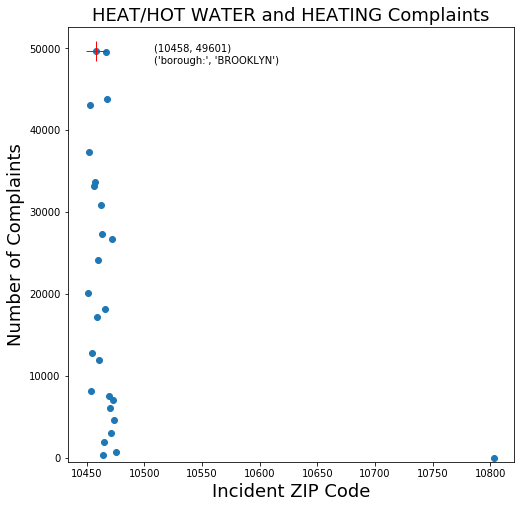

In [14]:
#plot No. of complaints vs. zip code for all boroughs
plt.figure(figsize=(8,8))
plt.scatter(df_complaint_incident_zip[:,0],df_complaint_incident_zip[:,1])
plt.plot(zip_max_complaints, maximum_complaints, 'r+', markersize=20)
plt.text(zip_max_complaints+50, maximum_complaints,(int(zip_max_complaints),int(maximum_complaints)))
plt.text(zip_max_complaints+50, maximum_complaints-1500, ('borough:', 'BROOKLYN'))
plt.xlabel('Incident ZIP Code', fontsize = 18)
plt.ylabel('Number of Complaints', fontsize= 18)
plt.title('HEAT/HOT WATER and HEATING Complaints', fontsize = 18)
plt.ylim((-500, int(maximum_complaints)+3000))
plt.rcParams.update({'font.size': 12})

## We will examine year 2018 (most recent year) to see if similar results are obtained

In [15]:
df_bronx_2018 = df_complaint_bronx[(df_complaint_bronx.created_date >= '2018-01-01')]
df2018_top_zip = df_bronx_2018.groupby(['incident_zip'], as_index=False).agg({'unique_key':'count'})
df2018_top_zip.columns = ["zip","cnt"]
df2018_top_zip.sort_values(['cnt'],ascending=False).head(10)

,zip,cnt
7,"10,458.000",6399
16,"10,467.000",6341
1,"10,452.000",5643
17,"10,468.000",5225
2,"10,453.000",5212
6,"10,457.000",4993
11,"10,462.000",4378
5,"10,456.000",4247
9,"10,460.000",3698
21,"10,472.000",3115


## <font color="red"> It's obvious that top 5 Zip Codes are the same historically to the most recent year, confirming we could filter the data for 2018 and reach simialr results.</font>

## Let's visualize the trend of # of complaints for top 5 Zip Codes with most complaints for recent 5 years

In [27]:
# change the 'created_date' object to datetime format
df_complaint_bronx['created_date'] =  pd.to_datetime(df_complaint_bronx['created_date'])
# Add created_year column to data
df_complaint_bronx['created_year'] = df_complaint_bronx['created_date'].map(lambda x: x.strftime('%Y')).astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


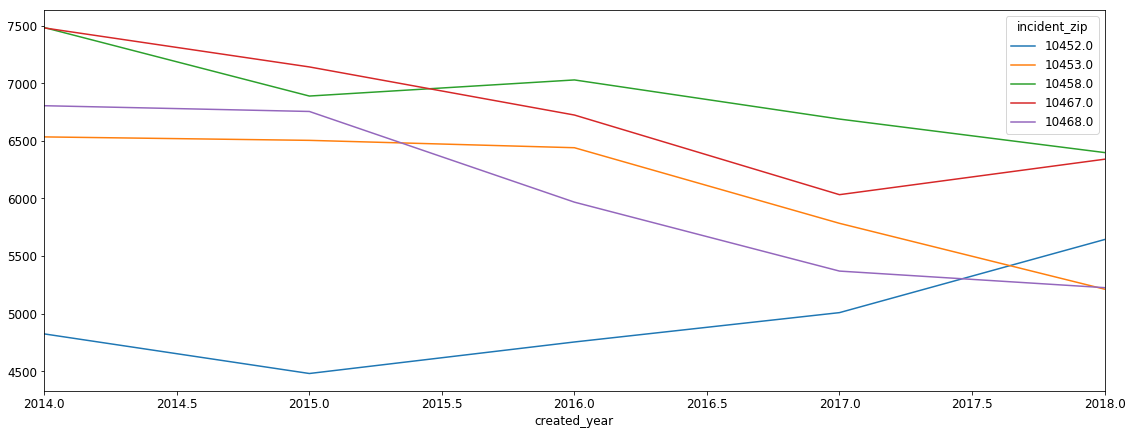

In [28]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint_bronx[df_complaint_bronx['created_year'].isin([2018,2017,2016,2015,2014]) & df_complaint_bronx['incident_zip'].isin([10458,10467,10468,10453,10452])]\
.groupby(['created_year', 'incident_zip']).count()['unique_key'].unstack().plot(ax=ax)

## <font color="red"> Above figure shows while the # of complaint trend is declining for 3 Zip Codes, # of complaints are rising for 10452 and 10467 from 2017  </font>

## Let's go deeper into Street Name level

In [32]:
df_top_Street = df_complaint_bronx.groupby(['street_name'], as_index=False).agg({'unique_key':'count'})
df_top_Street.columns = ["Street Name","cnt"]
df_top_Street.sort_values(['cnt'],ascending=False).head(10)

,Street Name,cnt
573,GRAND CONCOURSE,28638
772,MORRIS AVENUE,12457
96,BOYNTON AVENUE,9997
44,BAILEY AVENUE,8934
235,DR M L KING JR BOULEVARD,7666
216,DECATUR AVENUE,7354
923,SEDGWICK AVENUE,7352
1039,WALTON AVENUE,7132
189,CRESTON AVENUE,6602
1038,WALLACE AVENUE,6154


### It is obvious that three Streets: GRAND CONCOURSE, MORRIS AVENUE, and BOYNTON AVENUE are having top 3 highest number of complaints in last 5 years. Let's visualize the trend

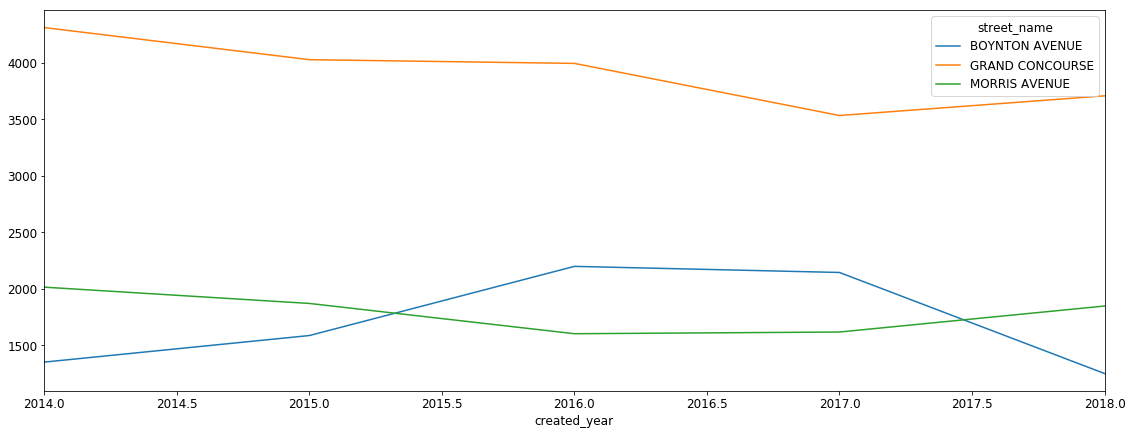

In [34]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint_bronx[df_complaint_bronx['created_year'].isin([2018,2017,2016,2015,2014]) & df_complaint_bronx['street_name'].isin(['GRAND CONCOURSE','MORRIS AVENUE','BOYNTON AVENUE'])]\
.groupby(['created_year', 'street_name']).count()['unique_key'].unstack().plot(ax=ax)

## <font color="red"> Above figure shows these 3 streets have been constantly experiencing high number of complaints </font>

## Let's go even deeper into Street Address level and look at top 10 with most complaints

In [36]:
df_top_Address = df_complaint_bronx[df_complaint_bronx['created_year']==2017].groupby(['incident_address','latitude','longitude','incident_zip'],as_index=False).\
    agg({"unique_key":"count"}) 
df_top_Address.columns = ["addr","lat","lng","zip","cnt"]
df_top_Address = df_top_Address[df_top_Address['cnt']>0][['addr','lat','lng','zip', 'cnt']].sort_values(by='cnt', ascending=False).head(10)
df_top_Address

,addr,lat,lng,zip,cnt
106,1025 BOYNTON AVENUE,40.825,-73.877,"10,472.000",1484
3129,2090 EAST TREMONT AVENUE,40.842,-73.858,"10,462.000",860
126,1030 BOYNTON AVENUE,40.825,-73.877,"10,472.000",418
4957,2968 PERRY AVENUE,40.870,-73.884,"10,458.000",409
1523,1425 DR M L KING JR BOULEVARD,40.843,-73.925,"10,452.000",388
2999,2040 BRONXDALE AVENUE,40.851,-73.867,"10,462.000",352
4450,266 BEDFORD PARK BOULEVARD,40.871,-73.886,"10,458.000",341
2799,1967 MARMION AVENUE,40.844,-73.887,"10,460.000",338
7565,750 GRAND CONCOURSE,40.823,-73.925,"10,451.000",313
4822,2856 WEBB AVENUE,40.873,-73.901,"10,468.000",278


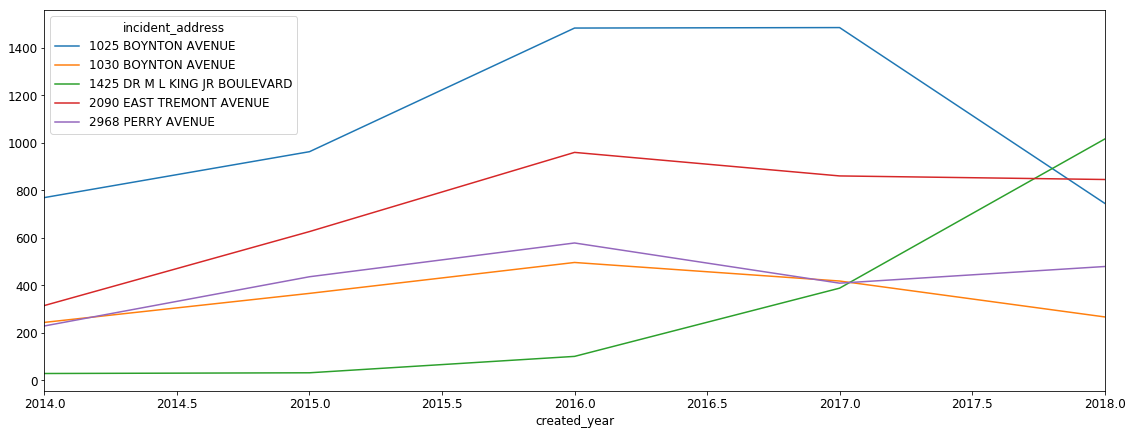

In [37]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint_bronx[df_complaint_bronx['created_year'].isin([2018,2017,2016,2015,2014]) & df_complaint_bronx['incident_address']\
 .isin(['1025 BOYNTON AVENUE','2090 EAST TREMONT AVENUE', '1030 BOYNTON AVENUE', '2968 PERRY AVENUE', '1425 DR M L KING JR BOULEVARD'])]\
.groupby(['created_year', 'incident_address']).count()['unique_key'].unstack().plot(ax=ax)

## <font color="red"> Above figure shows that '1425 DR M L KING JR BOULEVARD' address needs immediate attention as it's on an upwards trend of number of complaints </font>

## Let's view these addresses on NY map

In [38]:
!pip install folium
!pip install geopy

     |████████████████████████████████| 91 kB 12.4 MB/s eta 0:00:01


In [39]:
# let's start again with a clean copy of the map of NYC centered around BRONX
import folium

In [40]:
def print_map(geoList, n, msg):
    lat, lng, full_addr = geoList[0].split("\t")
    map=folium.Map(location=[float(lat),float(lng)], zoom_start=n, tiles='Stamen Terrain')
    for i in range(0, len(geoList)):
        lat, lng, full_addr = geoList[i].split("\t")
        if not msg:
            folium.Marker([float(lat), float(lng)], popup=full_addr).add_to(map)
        else:
            folium.Marker([float(lat), float(lng)], popup=("<B><font color=maroon>" + msg + "</font></B><BR>" + full_addr)).add_to(map)

    return map

In [41]:
geoList = []
for idx, row in df_top_Address.iterrows():
    addr_data = str(row['lat']) + "\t" + str(row['lng']) + "\t" + str(row['addr']) + " " + str(row['zip'])
    geoList.append(addr_data)

## We will use street view map and clusters to represent the problem affected area more concisely. This map is interactive and hence gives managers to spot immidiatley the top complaints areas.

In [42]:
map = print_map(geoList, 15, "Top HEAT Complaint Incident Addresses in BRONX")
map.save('map1.html')
map

# Concluding Remarks - Based on the analysis above the Department of Housing Preservation and Development of New York City should focus on BRONX first as this borough has most complaints pertaining to HEAT/HOT WATER complaints. Within Bronx the 3 addresses 1025 BOYNTON AVENUE, 2090 EAST TREMONT AVENUE and 1425 DR M L KING JR BOULEVARD. As shown in the Google Map the top 10 addresses where the Hewating Complaints are highest are well spread out. That essentially means focusing on a particular set of zip code may not help.